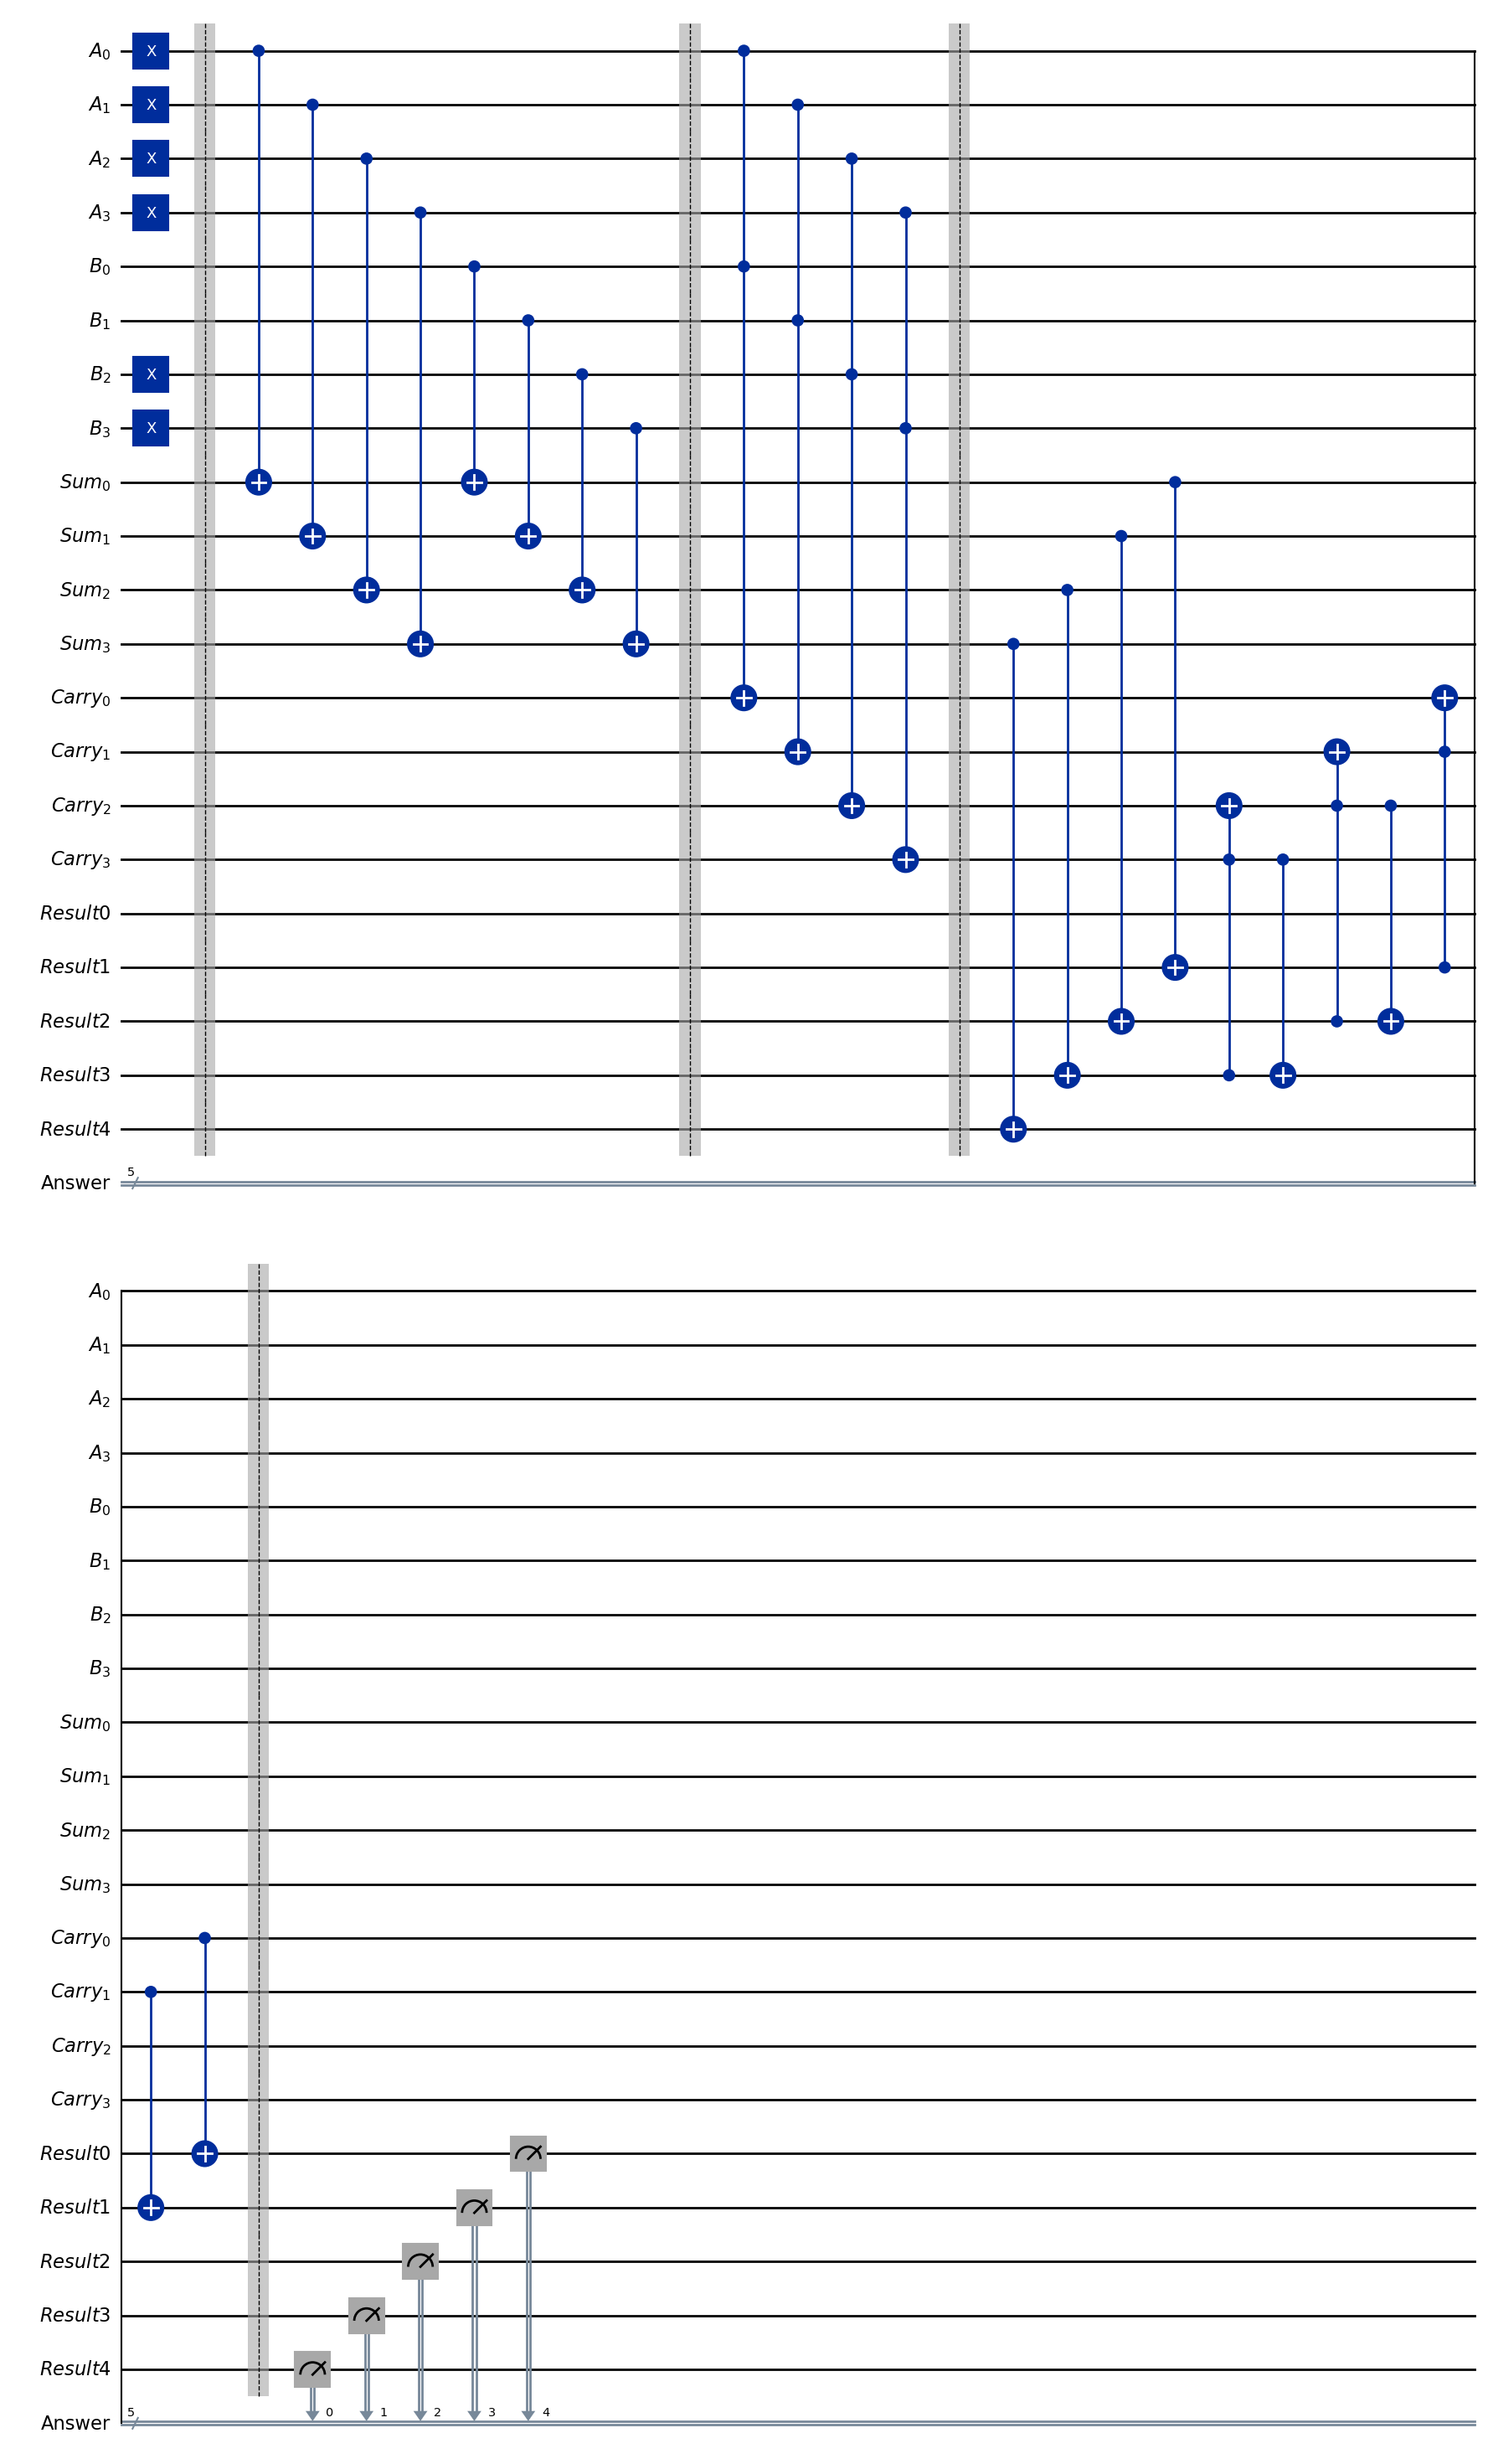

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


#A is first number's register and B is second number's register.

A = QuantumRegister(4, 'A')
B = QuantumRegister(4 , 'B')

S = QuantumRegister(4 , 'Sum')
C = QuantumRegister(4 , 'Carry')
R0 = QuantumRegister(1 , 'Result0')
R1 = QuantumRegister(1 , 'Result1')
R2 = QuantumRegister(1 , 'Result2')
R3 = QuantumRegister(1 , 'Result3')
R4 = QuantumRegister(1 , 'Result4')

Ans = ClassicalRegister(5 ,'Answer')

qc = QuantumCircuit(A,B,S,C,R0,R1,R2,R3,R4,Ans)





########################   Input values as binary   #######################

x = input("Enter a binary number:")
y = input("Enter another binary number:")

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])

############################################################################



qc.barrier()

#Add A[n] and B[n] values and copy them in S[n] (Sum) register

qc.cx(A[0],S[0])
qc.cx(B[0],S[0])
qc.cx(A[1],S[1])
qc.cx(B[1],S[1])
qc.cx(A[2],S[2])
qc.cx(B[2],S[2])
qc.cx(A[3],S[3])
qc.cx(B[3],S[3])

qc.barrier()

#checks if both A[n] and B[n] are '1' and copy result on C[n] (carry) register

qc.ccx(A[0],B[0],C[0])
qc.ccx(A[1],B[1],C[1])
qc.ccx(A[2],B[2],C[2])
qc.ccx(A[3],B[3],C[3])


qc.barrier()

qc.cx(S[3],R4)
qc.cx(S[2],R3)         #copy result of Sum of A[2] and B[2] (S[2]) to the Result register 'R3'
qc.ccx(R3,C[3],C[2])
qc.cx(C[3],R3)
qc.cx(S[1],R2)         #copy result of Sum of A[1] and B[1] (S[1]) to the Result register 'R2'
qc.ccx(R2,C[2],C[1])   #Checks if the sum of A[1] and B[1] result any carry value. ıf any copy it to Carry register C[1]
qc.cx(C[2],R2)         #Checks if there a carry value on C[2] and apply it to the result R2
qc.cx(S[0],R1)         #copy result of Sum of A[0] and B[0] (S[0]) to the Result register 'R2'
qc.ccx(R1,C[1],C[0])   #Checks if the sum of A[0] and B[0] result any carry value. ıf any copy it to Carry register C[0]
qc.cx(C[1],R1)         #Checks if there a carry value on C[1] and apply it to the result R1
qc.cx(C[0],R0)         #Checks if there a carry value on C[0] and apply it to the result R0


qc.barrier()

qc.measure(R4,Ans[0])
qc.measure(R3,Ans[1])
qc.measure(R2,Ans[2])
qc.measure(R1,Ans[3])
qc.measure(R0,Ans[4])


qc.draw("mpl")

{'10010': 1024}


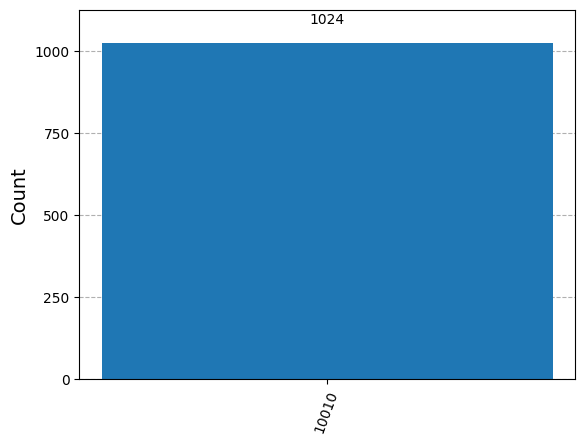

In [4]:
from qiskit_aer import AerSimulator


result = AerSimulator().run(qc).result()
stats = result.get_counts()

print(stats)

from qiskit.visualization import plot_histogram

plot_histogram(stats)